In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

# Linear Regression by hand !

In [3]:
# Import data from Pandas

## Data background : 
''' 
The file ex1data1.txt contains the dataset for our linear regression problem. 
The first column is the population of a city in 10,000s and the second column is
the profit of a food truck (in 10,000$) in that city. 
A negative value for profit indicates a loss.

'''

data1 = pd.read_csv('ex1data1.txt',header=None,names=['Population','Profit'])

# Exploring the Dataset

In [4]:
data1

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [5]:
data1.info() # implies that there are 97 examples in our dataset (very small !)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [6]:
data1.describe() 

# Tells us the statistical distribution of our data. 
# Profit seems to follow a Poisson distribution with mean ~ std.dev

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:>

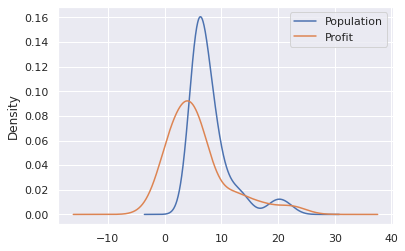

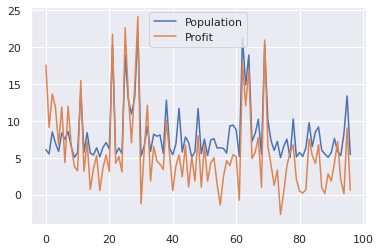

In [7]:
## Data Visualization

data1.plot.kde()
data1.plot.line()

# Population and Profit seem to have a good correlation. We test it out by measuring Pearson's correlation coefficient

In [8]:
# We implement some helper functions first (same can be found in ./helper_funcs.py): 

def mean(x):
    # given x can be an array or list
    # output is the mean value 
    mean_x = sum(x)/len(x)
    return mean_x

def mean_normalise(x):
    # given x can be an array or list
    # output is the same list that is normalised to the mean
    normalised_x = [xi - mean(x) for xi in x]
    return normalised_x

def std_dev(x):
    # given x can be an array or list
    # output is the standard deviation value
    norm_x = mean_normalise(x)
    var_x = sum(list(map(lambda x : x**2,normalised_x)))
    std_x = np.sqrt(var_x/len(x))  # use the square root function provided by numpy
    return std_x

def mean_normalization(x): 
    # given x can be an array or list
    # output is the same list that is normalised to the mean/std 
    norm_x = mean_normalise(x)
    std_x = std_dev(x)
    mean_normalised_x = [x_i/std_x for x_i in norm_x]
    return mean_normalised_x

# def train_test_split(dataframe,test_col,test_split):
# Next time !

## Correlation 

Pearson's correlation co-efficient is a statistic that measures linear correlation between two variables X and Y. 
It's output values range between -1 and +1. It is defined as : 

$$r = \frac{\sum_i^n (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum_i^n (x_i - \bar{x})^2 \sum_i^n(y_i - \bar{y}^2)}}$$

where $\bar{x}$ and $\bar{y}$ represent the mean values the two variables. 

In [9]:
def pearson_coefficient(x,y): 
    # We pass two arrays/lists of floating numbers to calculate the co-efficient of correlation
    
    norm_x = mean_normalise(x)
    norm_y = mean_normalise(y)
    norm_x_sqr = list(map(lambda x : x**2, norm_x))
    norm_y_sqr = list(map(lambda x : x**2, norm_y))
    
    num = sum([norm_x[i]*norm_y[i] for i in range(len(x))])
    den = np.sqrt(sum(norm_x_sqr)*sum(norm_y_sqr))
    
    r = num/den
    
    return r    

In [10]:
pearson_coefficient(data1['Population'].values,data1['Profit'].values)

# A value of 0.8378 signifies high linear correlation !

0.8378732325263413

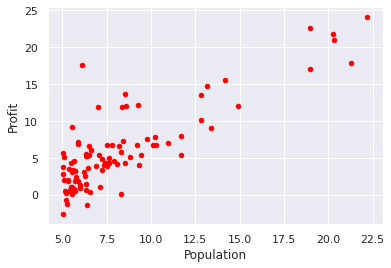

In [11]:
data1.plot.scatter(x='Population',y='Profit',c='red')
plt.show()

# Looks very linear !

# Machine Learning 

## Simple Linear Regression

- Given the Population, we predict the Profit ! 
- We hypothesize a linear relationship between the independent variable Population (X) and the dependent variable Profit (Y) and assume a relationship of the form $Y = \alpha X + \beta$
- The variables ($\alpha,\beta$) are the parameters of the problem that need to be determined by learning

In [12]:
X = np.array(data1['Population'])

In [13]:
m = len(X)
X = np.array(data1['Population']).reshape(m,1)
X = np.hstack((X,np.ones(m).reshape(m,1)))
Y = data1['Profit'].values.reshape(m,1)

# We do not need any normalization techniques for this dataset as the range of all columns is comparable and similar

- Here X and Y represent matrices of the input and output data respectively.
- X is a (m,2) matrix while Y is a (m,1) matrix where m is the number of rows in the initial dataset (here, 97)
- We want to estimate a parameter $\bar{\theta}$ such that 
$$ X \bar{\theta} \approx Y$$
- Note that $\bar{\theta}$ is a (2,1) matrix of the form $[\theta_1,\theta_2]$ of parameters that is to be learnt.

## Approach 
- We guess a random parameter matrix $\theta$
- We ompute the value of predicted Y and the corresponding "cost"
- We use gradient descent to reduce the cost and optimize the parameters in $\bar{\theta}$

In [14]:
# Guess 
np.random.seed(101)
theta = np.random.rand(2).reshape(2,1)
print(theta)

[[0.51639863]
 [0.57066759]]


# Linear Regression

## Computing cost

- Using our parameters $\bar{\theta}$, we obtain $Y_{pred} = X \bar{\theta}$
- We compute the cost or error with respect to the real Y as : 
$$J = \frac{1}{2m}\sum_i^m (Y_{pred} - Y )^2$$
$$J = \frac{1}{2m}\sum_i^m (X \bar{\theta} - Y)^2$$
$$J = \frac{1}{2m}\sum_i^m (X_1 \theta _1 + X_2 \theta _2 - Y)^2$$

## Gradient descent

- We perform Gradient descent to descent down the cost function, or reduce the cost function and optimize the parameters. We try to reduce the error by subtracting the gradient of the cost function with respect to parameters $\theta _1$ and $\theta _2$ respectively i.e, 

$$ \frac{\partial J}{\partial \theta _1} = \frac{1}{m} \sum_i^m (X_1 \theta _1 + X_2 \theta _2  - Y)*X_1 $$
$$ \frac{\partial J}{\partial \theta _2} = \frac{1}{m} \sum_i^m (X_1 \theta _1 + X_2 \theta _2  - Y)*X_2 $$

We then perform a gradient descent (regulated by learning-rate - $\alpha$) and update the parameters:

$$ \theta _i = \theta _i - \alpha * \frac{\partial J}{\partial \theta _i}$$

where $\alpha$ is the learning rate parameter


In [15]:
def compute_cost(X,Y,theta):
    y_pred = X@theta
    J = sum((Y-y_pred)**2)
    J = J/(2*len(X))
    return J

def compute_grad(X,Y,theta):
    y_pred = X@theta
    theta_0 = (1/m)*sum((y_pred-Y)*(X[:, 0].reshape(m,1)))
    theta_1 = (1/m)*sum((y_pred-Y)*(X[:, 1].reshape(m,1)))
    grad_theta = np.vstack((theta_0, theta_1))
    return grad_theta

def gradient_descent(X,Y,theta,alpha,n_iters):
    
    J_list = []
    for i in range(n_iters):
        J = compute_cost(X,Y,theta=theta)
        grad_theta = compute_grad(X,Y,theta=theta)
        theta -= alpha*grad_theta
        J_list.append(J)
    return theta, J_list

In [16]:
l_rate = 0.02
iters = 1000
theta, J = gradient_descent(X, Y, theta, l_rate, iters)

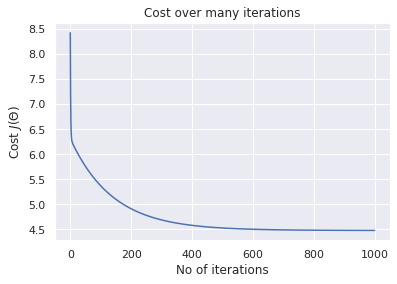

In [17]:
plt.plot(J)
plt.xlabel('No of iterations')
plt.ylabel('Cost $J(\Theta)$')
plt.title('Cost over many iterations')

plt.show()
# cost decreses with number of iterations ! 

In [22]:
# Learnt Parameters ! 

print(theta)
Y_predicted = X@theta

[[ 1.18085458]
 [-3.77454895]]


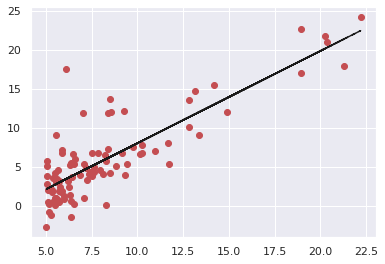

In [25]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.plot(X[:,0],Y,'ro',label='Dataset')
ax.plot(X[:,0],Y_predicted,'k--',label='Regression Line')

plt.show()

## Computing Goodness of Fit

In statistics, the co-efficient of determination called $R^2$, is a measure of how close the data are to the fitted regression line and is defined as : 

$$R^2 = 1 - \frac{\sum_i^m (y_i - y_i^{pred})^2}{\sum_i^m (y_i - \bar{y_i})^2}$$


Reference : [Co-efficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [22]:
def r_sqr(y,y_pred):
    num = sum((y-y_pred)**2)
    den = sum((y-mean(y))**2)
    r_sqr = 1 - (num/den)
    return r_sqr[0]

In [24]:
r2 = r_sqr(Y,y_pred=X@theta)
print(r2)

# A pretty descent R^2 !! 

0.7019425005978305


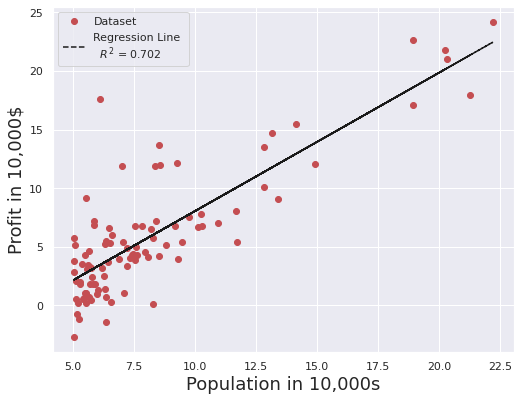

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

ax.plot(X[:,0],Y,'ro',label='Dataset')
ax.plot(X[:,0],Y_predicted,'k--',label='Regression Line \n  $R^2$ = %0.3f' %(r2))
ax.set_xlabel('Population in 10,000s',fontsize=18)
ax.set_ylabel('Profit in 10,000$',fontsize=18)

ax.legend()

plt.show()

# THE END 

What we did: 
- Some preliminary visualization of the dataset
- Found that the two variables have a linear dependence (Pearson's co-efficient)
- Used Univariate Linear Regression to estimate the parameters for a linear relation
- Our Machine learnt by itself to solve the estimation problem !